# **Logistic Regression to Predict Heart Faliure**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## **Data loading and preprocessing**

In [3]:
df = pd.read_csv("./heart_failure_clinical_records.csv")
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
def sigmoid(z):
    z = np.array(z)
    z = np.clip(z, -500, 500)
    return 1/(1+np.exp(-z))

In [6]:
def compute_cost(y_pred, y):
    y_pred = np.copy(np.array(y_pred)).reshape(-1, 1)
    y = np.copy(np.array(y)).reshape(-1, 1)
    y_pred = np.clip(y_pred, 1e-218, 1-1e-8)
    return np.sum(-(np.log(y_pred)*y)-(np.log(1-y_pred)*(1-y)))/len(y)

In [7]:
def calculate_accuracy(y_pred, y):
    y_pred = np.array(y_pred)
    y = np.array(y)
    return 1 - np.sum(np.abs(y_pred - y))/len(y)

In [8]:
def normalize(v):
    norm = np.linalg.norm(v, axis=0)
    while norm.any == 0:
       norm[np.argmin(norm)] = 1
    return norm, v / norm

class LogisticRegressor:
    def __init__(self, debug = False, normalize = False):
        self.a = 0
        self.b = 0
        self.fitted = False
        self.debug = debug
        self.normalize = normalize
        if normalize:
            self.x_norm = 0
    def fit(self, X, y, learning_rate = 1e-03, max_iter = 100, min_error = 1e-03, verbose = True, l2 = 0):
        self.a = np.random.randn(X.shape[1])
        self.fitted = True
        costs = []
        accuracies = []
        if self.normalize:
            self.x_norm, X = normalize(X)
            X = X*10
            self.x_norm /= 10
        prev_cost = 1e+10
        for i in range(1, max_iter + 1):

            # Predicting
            z = (self.a @ X.T) + self.b
            y_pred = sigmoid(z)
            difference = (y_pred - y).reshape(-1, 1)

            # Calculating cost
            m = len(y)
            cost = compute_cost(y_pred, y)

            # Finding differentials
            db = (2/m)*np.sum(difference)
            da = (2/m)*(difference.T@X)[:][0]

            
            # Updating parameters
            self.b -= learning_rate*db
            self.a -= learning_rate*da

            # L2 Regularization
            da += (2*l2*self.a/m)

            # if(abs((prev_cost - cost)/cost) <= min_error):
            #     print("Model Converged")
            #     break
            # prev_cost = cost
            costs.append(cost)
            accuracy = calculate_accuracy(y_pred, y)
            if(max_iter < 1000 or i%(int((max_iter)/100)) == 0):
                if verbose:
                    print(f"Epoch {i}: ", end='')
                    print("Cost=", cost, end='\t')
                    print("Accuracy: ", accuracy)
                if(self.debug):
                    print(self.a, self.b, da, db)
                    print(z)
            accuracies.append(accuracy)
        ax1 = plt.subplot(1, 2, 1)
        plt.title("Cost")
        ax2 = plt.subplot(1, 2, 2)
        plt.title("Accuracy")
        ax1.plot(costs)
        ax2.plot(accuracies)


    def predict(self, X):
        if not self.fitted:
            print("Please fit data before predicting!")
            return
        
        if(type(X) == int or type(X) == float):
            X = np.array(X).reshape(1,1)
        X = np.array(X)

        if self.normalize:
            X = X/self.x_norm

        return sigmoid((self.a @ X.T) + self.b)
    def get_params(self):
        return self.a, self.b
        

## Testing on dummy data

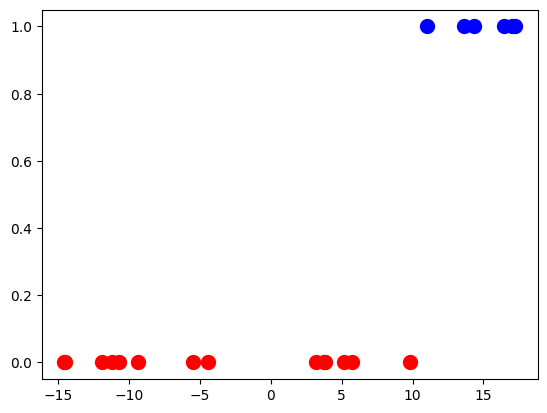

In [9]:
model = LogisticRegressor()
X = np.random.uniform(-15, 18, 20)
y = np.zeros(20)
y[X >= 10] = 1

pos = y == 0
neg = y == 1
plt.scatter(X[pos], y[pos], color='red',marker='o', linewidth=5)
plt.scatter(X[neg], y[neg], color='blue',marker='o', linewidth=5)
plt.show()

In [10]:
X = X.reshape(-1, 1)

Epoch 150: Cost= 0.15113990353576331	Accuracy:  0.8763754947392288
Epoch 300: Cost= 0.11317575291243438	Accuracy:  0.9069537791126098
Epoch 450: Cost= 0.09612663301037311	Accuracy:  0.9211746459230461
Epoch 600: Cost= 0.0861726299141709	Accuracy:  0.9295461734139642
Epoch 750: Cost= 0.07953490385491617	Accuracy:  0.9351249307907741
Epoch 900: Cost= 0.07473065269058217	Accuracy:  0.9391456613116327
Epoch 1050: Cost= 0.07105417614757722	Accuracy:  0.9422050109099055
Epoch 1200: Cost= 0.06812496587835704	Accuracy:  0.9446273132182891
Epoch 1350: Cost= 0.06571888554446804	Accuracy:  0.946604401318195
Epoch 1500: Cost= 0.06369486509955583	Accuracy:  0.9482572136544684
Epoch 1650: Cost= 0.061959413441130595	Accuracy:  0.949665906894555
Epoch 1800: Cost= 0.0604479538907754	Accuracy:  0.9508857956813529
Epoch 1950: Cost= 0.05911434223127578	Accuracy:  0.951956342138194
Epoch 2100: Cost= 0.05792465778327077	Accuracy:  0.9529064948981963
Epoch 2250: Cost= 0.05685335924963695	Accuracy:  0.9537579

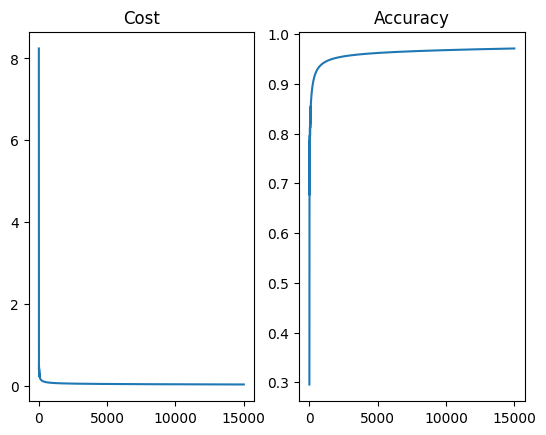

In [11]:
model.fit(X, y, learning_rate=0.1, min_error=1e-6, max_iter=15000)

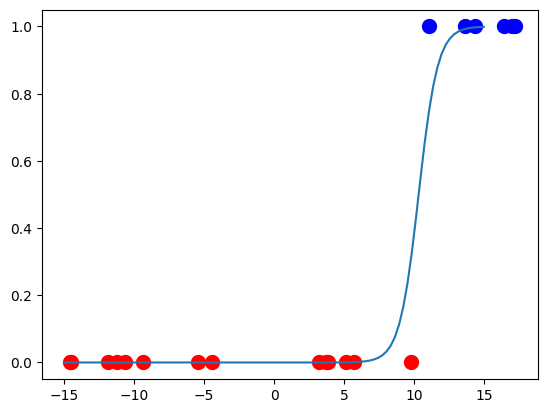

In [12]:
pos = y == 0
neg = y == 1
plt.scatter(X[pos], y[pos], color='red',marker='o', linewidth=5)
plt.scatter(X[neg], y[neg], color='blue',marker='o', linewidth=5)


s1 = np.linspace(-15, 15, 100)
s2 = model.predict(s1.reshape(-1, 1))
plt.plot(s1, s2)
plt.show()

## Testing on Kaggle Dataset

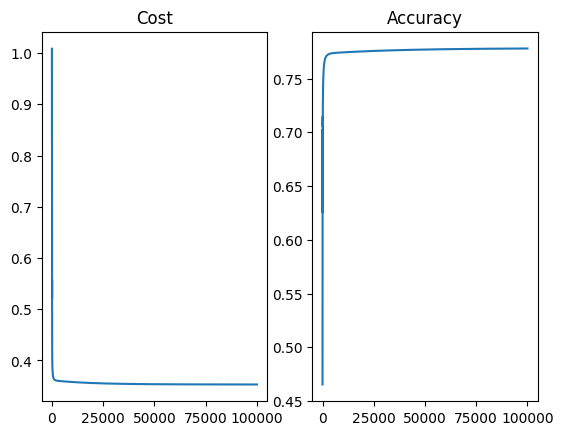

In [19]:
Model = LogisticRegressor(normalize=True)
Model.fit(X_train, y_train, learning_rate=5, max_iter=100000, verbose=False)

In [20]:
predictions = [1 if i > 0.5 else 0 for i in Model.predict(X_test)]
for i in range(10):
    print("Actual y: ", y_test[i])
    print("Predicted y: ", predictions[i])
print("Accuracy on test set:", calculate_accuracy(predictions, y_test))

Actual y:  1
Predicted y:  1
Actual y:  0
Predicted y:  0
Actual y:  0
Predicted y:  0
Actual y:  1
Predicted y:  0
Actual y:  0
Predicted y:  0
Actual y:  0
Predicted y:  0
Actual y:  0
Predicted y:  0
Actual y:  0
Predicted y:  0
Actual y:  1
Predicted y:  1
Actual y:  0
Predicted y:  0
Accuracy on test set: 0.8200000000000001


In [21]:
# Comparing with sklearn
from sklearn.linear_model import LogisticRegression
sk_model = LogisticRegression()
sk_model.fit(X_train, y_train)
sk_model.score(X_test, y_test)

0.81

## **Handling overfitting of data**
1- More training examples \
2- Reduce number of feature \
3- Regularization. Helps reduce the impact of features by penalizing the weights. Causing some features to be left unused completely


## **Logisitc Regression with Regularization**

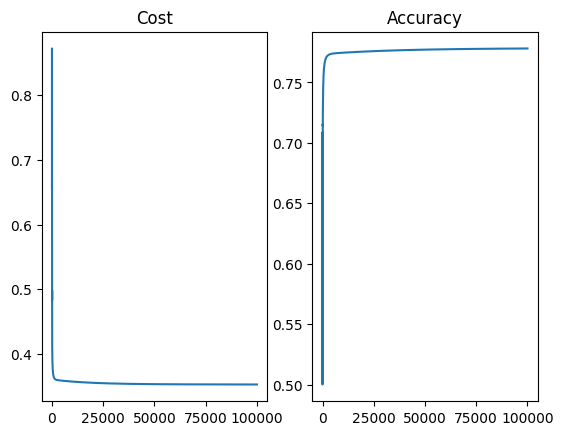

In [18]:
Model = LogisticRegressor(normalize=True)
Model.fit(X_train, y_train, learning_rate=5, max_iter=100000, verbose=False, l2 = 10)

In [17]:
predictions = [1 if i > 0.5 else 0 for i in Model.predict(X_test)]
for i in range(10):
    print("Actual y: ", y_test[i])
    print("Predicted y: ", predictions[i])
print("Accuracy on test set:", calculate_accuracy(predictions, y_test))

Actual y:  1
Predicted y:  1
Actual y:  0
Predicted y:  0
Actual y:  0
Predicted y:  0
Actual y:  1
Predicted y:  1
Actual y:  0
Predicted y:  0
Actual y:  0
Predicted y:  0
Actual y:  0
Predicted y:  0
Actual y:  0
Predicted y:  0
Actual y:  1
Predicted y:  1
Actual y:  0
Predicted y:  0
Accuracy on test set: 0.831
